In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

bikesharing_df = pd.read_csv('archive/bike_sharing_daily.csv')
bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
bikesharing_df['dteday'] =pd.to_datetime(bikesharing_df['dteday'])

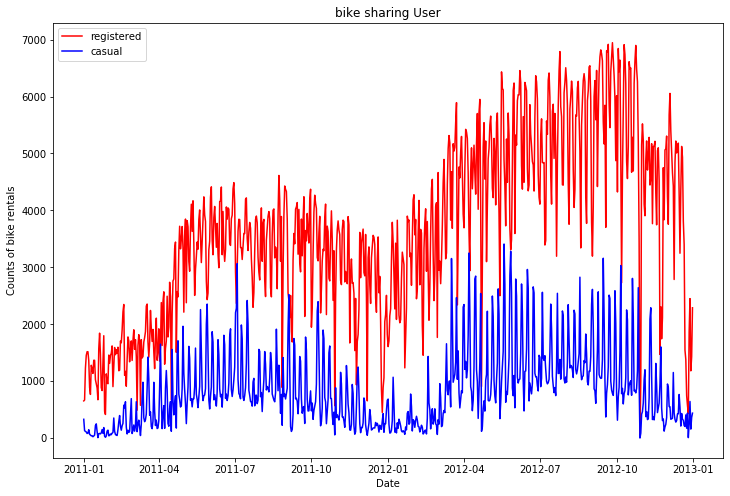

In [8]:
plt.figure(figsize=(12,8))

plt.plot(bikesharing_df['dteday'],bikesharing_df['registered'],color='r',label='registered')

plt.plot(bikesharing_df['dteday'],bikesharing_df['casual'],color='b',label='casual')

plt.legend(loc='upper left')

plt.title('bike sharing User')
plt.xlabel('Date')
plt.ylabel('Counts of bike rentals')

plt.show()

In [4]:
year_df = bikesharing_df.groupby('yr',as_index=False).mean()
year_df[['yr','cnt']]

,yr,cnt
0,0,3405.761644
1,1,5599.934426


Text(0, 0.5, 'Bikes rented')

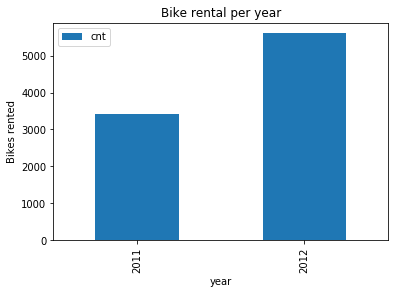

In [12]:
year_df.plot.bar('yr','cnt')

plt.title('Bike rental per year')
plt.xticks([0,1],['2011','2012'])
plt.xlabel('year')
plt.ylabel('Bikes rented')

In [13]:
year_data = bikesharing_df.loc[bikesharing_df['yr']==1]
year_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
365,366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
367,368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
369,370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272


In [19]:
month_data = year_data[['mnth','cnt']].groupby('mnth',as_index=False).mean()
month_data

,mnth,cnt
0,1,3120.774194
1,2,3556.448276
2,3,5318.548387
3,4,5807.466667
4,5,6318.225806
5,6,6761.000000
6,7,6567.967742
7,8,6919.451613
8,9,7285.766667
9,10,6414.225806


In [20]:
month_data['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                         ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                        inplace=True)
month_data

,mnth,cnt
0,Jan,3120.774194
1,Feb,3556.448276
2,Mar,5318.548387
3,Apr,5807.466667
4,May,6318.225806
5,Jun,6761.000000
6,Jul,6567.967742
7,Aug,6919.451613
8,Sep,7285.766667
9,Oct,6414.225806


Text(0, 0.5, 'Bikes rented')

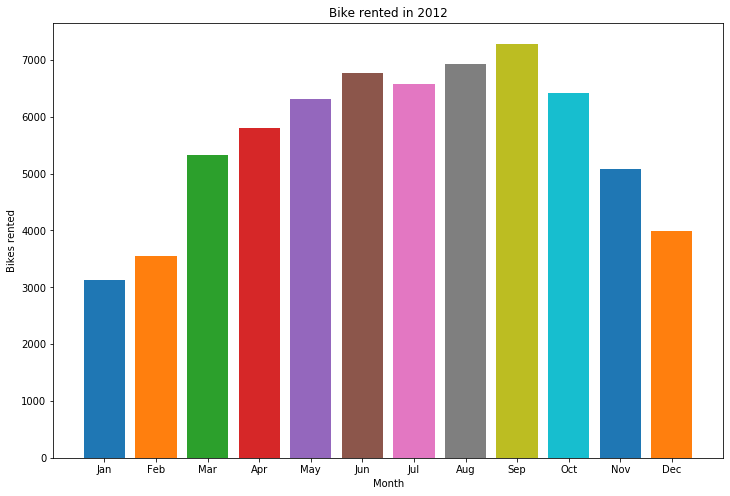

In [22]:
color = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
plt.figure(figsize=(12,8))

plt.bar(month_data['mnth'],month_data['cnt'],color=color)
plt.title('Bike rented in 2012')
plt.xlabel('Month')
plt.ylabel('Bikes rented')

([<matplotlib.axis.XTick at 0x7f0eeadac890>],
 <a list of 1 Text xticklabel objects>)

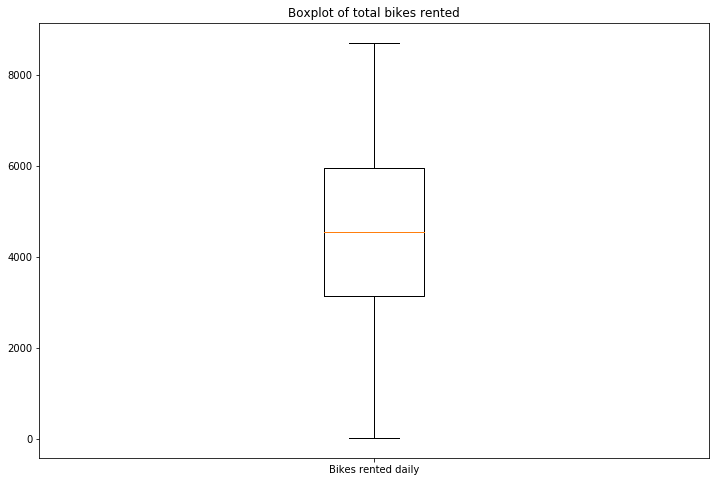

In [27]:
plt.figure(figsize=(12,8))

plt.boxplot(bikesharing_df['cnt'])

plt.title('Boxplot of total bikes rented')
plt.xticks([1],['Bikes rented daily'])

In [28]:
selected_bikers = bikesharing_df[['casual','registered']]
selected_bikers.head()

,casual,registered
0,331,654
1,131,670
2,120,1229
3,108,1454
4,82,1518


In [30]:
columns = selected_bikers.columns
columns

Index(['casual', 'registered'], dtype='object')

In [35]:
bike_data_array = selected_bikers.values
bike_data_array

array([[ 331,  654],
       [ 131,  670],
       [ 120, 1229],
       ...,
       [ 159, 1182],
       [ 364, 1432],
       [ 439, 2290]])

In [38]:
colors = ['g','m']

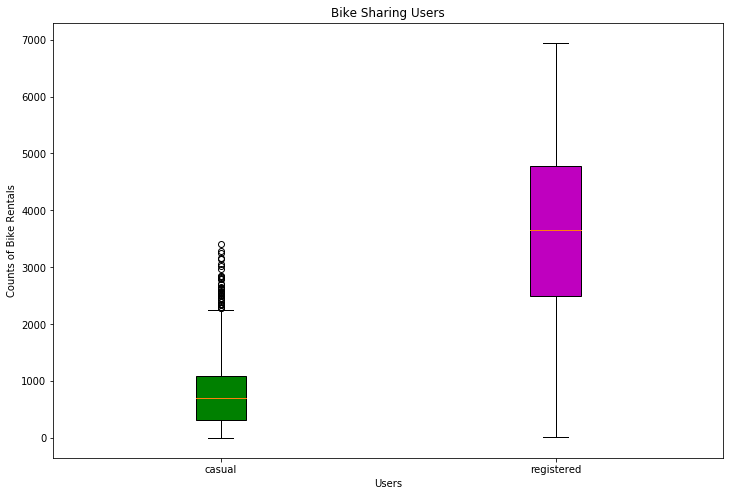

In [39]:
plt.figure(figsize=(12,8))

bp = plt.boxplot(bike_data_array,patch_artist=True,labels=columns)

for i in range((len(bp['boxes']))):
    bp['boxes'][i].set(facecolor=colors[i])
    
plt.title('Bike Sharing Users')
plt.xlabel('Users')
plt.ylabel('Counts of Bike Rentals')
plt.show()

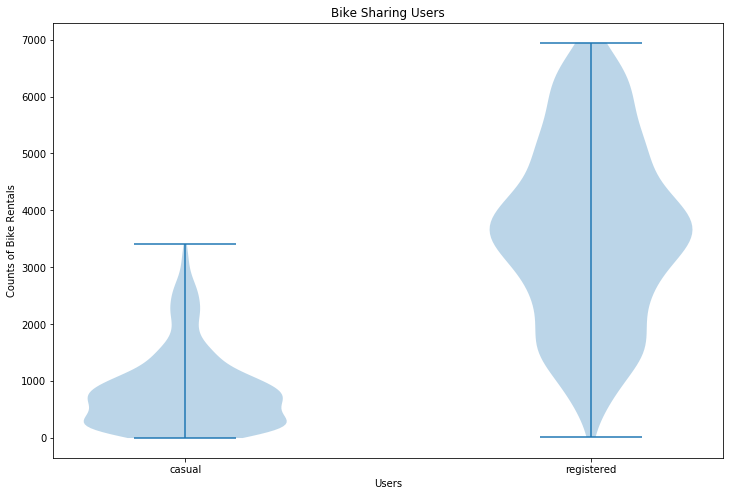

In [43]:
plt.figure(figsize=(12,8))
vp = plt.violinplot(bike_data_array)

plt.xticks([1,2],columns)

plt.title('Bike Sharing Users')
plt.xlabel('Users')
plt.ylabel('Counts of Bike Rentals')
plt.show()

In [44]:
season_data = bikesharing_df[['season','cnt']].groupby('season',as_index=False).sum()
season_data

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [46]:
season_data.replace([1,2,3,4],['spring','summer','fall','winter'],inplace=True)
season_data

,season,cnt
0,spring,471348
1,summer,918589
2,fall,1061129
3,winter,841613


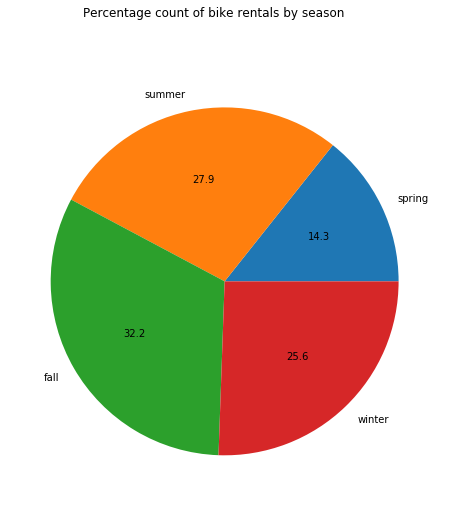

In [49]:
plt.figure(figsize=(12,8))

plt.pie(season_data['cnt'],labels=season_data['season'],autopct='%.1f')

plt.suptitle('Percentage count of bike rentals by season')

plt.show()

Text(0.5, 0.98, 'Percentage Count of Bikes Rentals per Season')

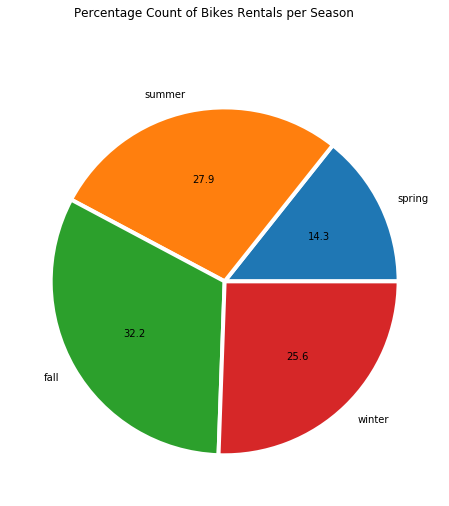

In [51]:
plt.figure(figsize=(12,8))

plt.pie(season_data['cnt'],labels=season_data['season'],
       autopct='%.1f',
       wedgeprops={'linewidth':4,
                 'edgecolor': "white"})

plt.suptitle('Percentage Count of Bikes Rentals per Season')

In [52]:
explode_max = (0,0,0.2,0)
explode_min = (0.2,0,0,0)

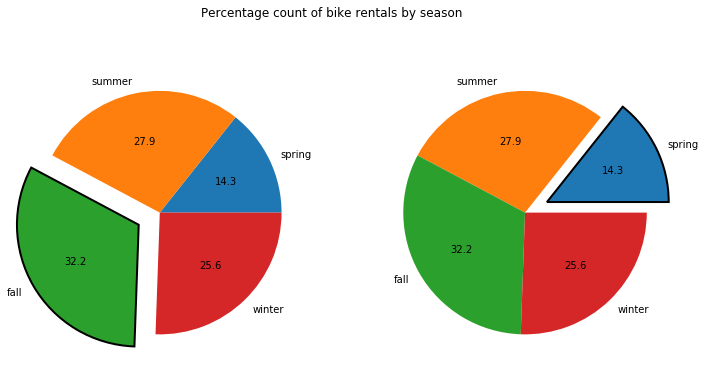

In [58]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

wedges,texts,autotexts = ax1.pie(season_data['cnt'],labels=season_data['season'],
                              autopct='%.1f',
                              explode=explode_max)
wedges[2].set(edgecolor='k',linewidth=2)

wedges,texts,autotexts = ax2.pie(season_data['cnt'],labels=season_data['season'],
                                autopct='%.1f',
                                explode=explode_min)
wedges[0].set(edgecolor='k',linewidth=2)

plt.suptitle('Percentage count of bike rentals by season')
plt.show()